In [47]:
# importing libraries
from pathlib import Path 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [48]:
# importing S&P 500 data
sp500_path = Path('S&P500.csv')
sp500_df = pd.read_csv(sp500_path, index_col = 'Symbol')
sp500_df.head(3)

,Name,Sector
Symbol,,
MMM,3M Company,Industrials
AOS,A.O. Smith Corp,Industrials
ABT,Abbott Laboratories,Health Care


In [49]:
# importing sharpe ratio data
sharpe_path = Path('sharpe_ratios.csv')
sharpe_df = pd.read_csv(sharpe_path, index_col = 'Stock')
sharpe_df

,Sharpe Ratio
Stock,
DXC,0.665931
BBY,0.823915
AMG,1.097986
CNP,1.361230
WMT,1.271096
...,...
MCO,0.927984
HII,1.154338
RL,1.685028


In [50]:
# importing stock data
stock_data_path = Path('stock_data.csv')
stock_data_df = pd.read_csv(stock_data_path, index_col = 'Stock')
stock_data_df.head(3)

,pe,eps,beta,marketcap,shares
Stock,,,,,
DXC,NaN,-6.26,NaN,7819681142,253721000
BBY,15.98,5.64,1.12,23344272933,258777000
AMG,267.18,0.31,1.69,4084648875,49272000


In [51]:
# concatenating the datasets and dropping nulls
merged_df = pd.concat([sp500_df,sharpe_df,stock_data_df], axis='columns', join='inner')
merged_df.dropna(inplace=True)
merged_df.reset_index(inplace=True)
merged_df.columns = ['ticker','name','sector','sharpe ratio','P/E ratio','EPS','beta','mkt cap','shares']
merged_df.head(2)
type(merged_df)

pandas.core.frame.DataFrame

In [52]:
# pickling merged_df for use in dashboard2.ipnyb file
filename = "merged_df_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(merged_df, outfile)
outfile.close()




Text(0, 0.5, 'Sharpe Ratio')

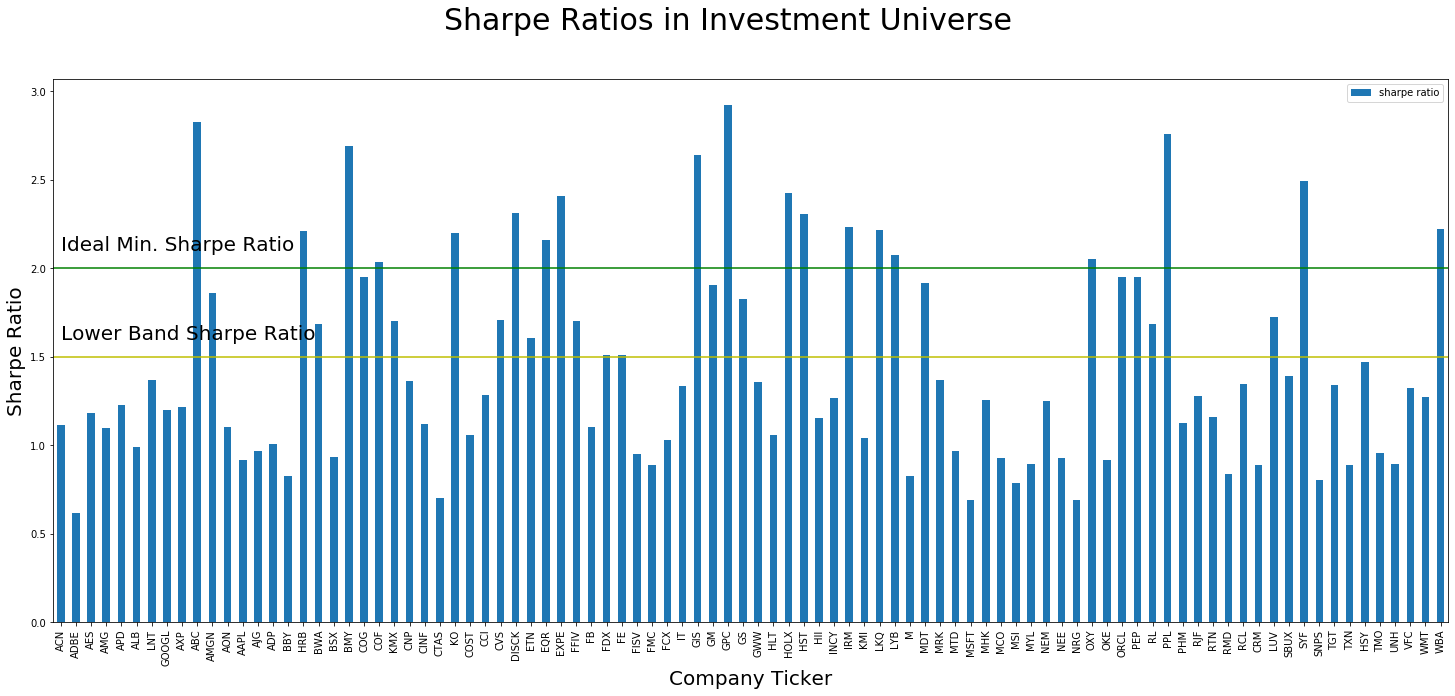

In [53]:
# plotting sharpe ratios
merged_df.plot(x='ticker',y='sharpe ratio', kind='bar', figsize=(25,10))
plt.suptitle('Sharpe Ratios in Investment Universe', fontsize=30)
plt.axhline(2, color='g')
plt.text(0,2.1,'Ideal Min. Sharpe Ratio',rotation=0,fontsize=20)
plt.axhline(1.5, color='y')
plt.text(0,1.6,'Lower Band Sharpe Ratio',rotation=0,fontsize=20)
plt.xlabel('Company Ticker',fontsize=20)
plt.ylabel('Sharpe Ratio',fontsize=20)

(0, 100)

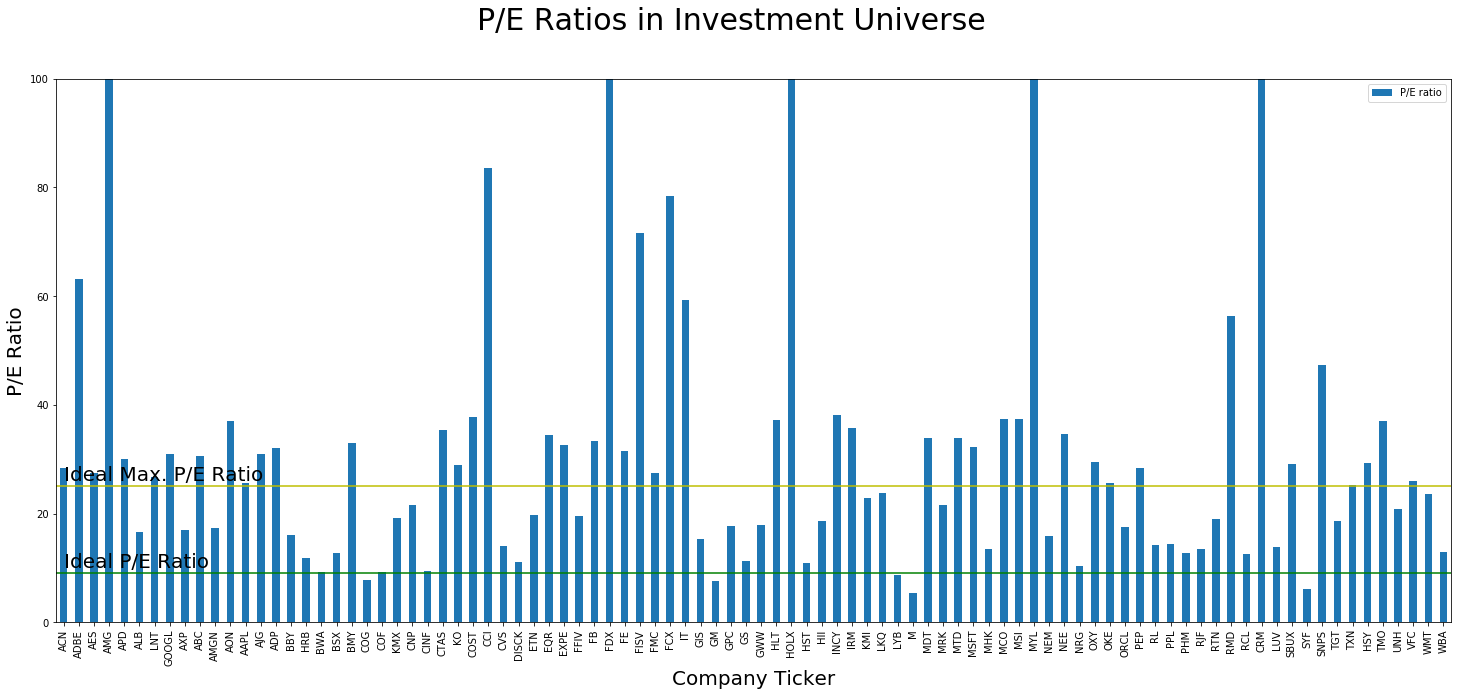

In [54]:
# plotting P/E Ratios
merged_df.plot(x='ticker',y='P/E ratio', kind='bar', figsize=(25,10))
plt.suptitle('P/E Ratios in Investment Universe', fontsize=30)
plt.axhline(9, color='g')
plt.text(0,10,'Ideal P/E Ratio',rotation=0,fontsize=20)
plt.axhline(25, color='y')
plt.text(0,26,'Ideal Max. P/E Ratio',rotation=0,fontsize=20)
plt.xlabel('Company Ticker', fontsize=20)
plt.ylabel('P/E Ratio',fontsize=20)
plt.ylim(0,100)

In [55]:
# printing the dataset to csv 
output = 'selection_data.csv'

with open(output, 'w') as file:
    file.write(merged_df.to_csv(index=False))

In [56]:
# creating datasets for each sector
cd_mask = merged_df['sector'] == 'Consumer Discretionary'
cd_df = merged_df.loc[cd_mask]
cd_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

cs_mask = merged_df['sector'] == 'Consumer Staples'
cs_df = merged_df.loc[cs_mask]
cs_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

energy_mask = merged_df['sector'] == 'Energy'
energy_df = merged_df.loc[energy_mask]
energy_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

financials_mask = merged_df['sector'] == 'Financials'
financials_df = merged_df.loc[financials_mask]
financials_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

hc_mask = merged_df['sector'] == 'Health Care'
hc_df = merged_df.loc[hc_mask]
hc_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

industrials_mask = merged_df['sector'] == 'Industrials'
industrials_df = merged_df.loc[industrials_mask]
industrials_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

it_mask = merged_df['sector'] == 'Information Technology'
it_df = merged_df.loc[it_mask]
it_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

materials_mask = merged_df['sector'] == 'Materials'
materials_df = merged_df.loc[materials_mask]
materials_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

re_mask = merged_df['sector'] == 'Real Estate'
re_df = merged_df.loc[re_mask]
re_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

utilities_mask = merged_df['sector'] == 'Utilities'
utilities_df = merged_df.loc[utilities_mask]
utilities_df.sort_values(by = 'sharpe ratio', ascending = False, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-pack

In [57]:
cd_df.head()

# GPC - high sharpe, decent p/e ratio

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
44,GPC,Genuine Parts,Consumer Discretionary,2.924464,17.71,5.45,0.89,14016415887,145293000
33,EXPE,Expedia Inc.,Consumer Discretionary,2.407311,32.58,3.77,1.01,17792025802,139363000
30,DISCK,Discovery Communications-C,Consumer Discretionary,2.309659,11.10,2.59,1.45,15392873644,360664000
54,LKQ,LKQ Corporation,Consumer Discretionary,2.216066,23.73,1.40,1.30,10174538633,306462000
43,GM,General Motors,Consumer Discretionary,1.903721,7.60,4.57,1.38,49672072361,1429002000


In [58]:
cs_df

# GIS - high sharpe, decent p/e

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
42,GIS,General Mills,Consumer Staples,2.641281,15.34,3.48,0.73,32242795100,604817000
91,WBA,Walgreens Boots Alliance,Consumer Staples,2.224201,13.00,4.07,0.92,46817805348,885862000
26,KO,Coca-Cola Company (The),Consumer Staples,2.197158,28.99,2.07,0.41,256586003265,4280000000
71,PEP,PepsiCo Inc.,Consumer Staples,1.951250,28.31,5.19,0.53,204968008309,1389545000
29,CVS,CVS Health,Consumer Staples,1.707963,14.05,5.08,0.93,92849804253,1300964000
86,HSY,The Hershey Company,Consumer Staples,1.469682,29.33,5.47,0.02,23779704176,148308000
90,WMT,Wal-Mart Stores,Consumer Staples,1.271096,23.55,5.00,0.36,334474559018,2837175000
27,COST,Costco Wholesale Corp.,Consumer Staples,1.060644,37.75,8.43,0.90,140615987901,441758000


In [59]:
energy_df

# COG - decent sharpe, good p/e

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
68,OXY,Occidental Petroleum,Energy,2.054771,29.53,1.41,0.90,37161985836,893317000
20,COG,Cabot Oil & Gas,Energy,1.952983,7.80,1.90,0.47,6037284157,407925000
53,KMI,Kinder Morgan,Energy,1.038470,22.87,0.96,0.81,49831386000,2265063000
69,OKE,ONEOK,Energy,0.917326,25.56,3.01,1.11,31799253894,413085000


In [60]:
financials_df

# SYF - good sharpe, good p/e, nice eps

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
82,SYF,Synchrony Financial,Financials,2.493336,6.07,5.56,1.21,20704848750,613477000
16,HRB,Block H&R,Financials,2.210675,11.75,1.90,0.23,4369605316,195246000
21,COF,Capital One Financial,Financials,2.034764,9.31,11.02,1.25,46865423721,456600000
45,GS,Goldman Sachs Group,Financials,1.828821,11.27,21.03,1.32,83946946608,354087000
75,RJF,Raymond James Financial Inc.,Financials,1.281138,13.44,7.36,1.50,13782151374,139284000
8,AXP,American Express Co,Financials,1.214408,17.01,7.99,0.99,111178449600,808041000
24,CINF,Cincinnati Financial,Financials,1.121374,9.52,12.10,0.57,18822318390,163374000
11,AON,Aon plc,Financials,1.104319,37.00,6.37,0.83,54701475530,234137000
3,AMG,Affiliated Managers Group Inc,Financials,1.097986,267.18,0.31,1.69,4084648875,49272000
13,AJG,Arthur J. Gallagher & Co.,Financials,0.967112,31.03,3.52,0.76,20549043209,188247000


In [61]:
hc_df

# AMGN - not highest sharpe, but decent p/e and very good eps

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
9,ABC,AmerisourceBergen Corp,Health Care,2.824204,30.62,3.08,1.01,19427969245,205892000
19,BMY,Bristol-Myers Squibb,Health Care,2.688515,33.05,2.01,0.76,155607591281,2344185000
48,HOLX,Hologic,Health Care,2.425412,173.01,0.31,0.85,13960272160,263302000
57,MDT,Medtronic plc,Health Care,1.917921,33.97,3.45,0.60,157266553194,1340378000
10,AMGN,Amgen Inc,Health Care,1.861649,17.36,12.88,1.12,131810065840,589807000
58,MRK,Merck & Co.,Health Care,1.368058,21.52,3.84,0.57,210425581484,2545984000
51,INCY,Incyte,Health Care,1.268258,38.21,2.05,1.06,17006076538,216776000
59,MTD,Mettler Toledo,Health Care,0.969242,33.97,22.47,1.39,18357249893,24053000
87,TMO,Thermo Fisher Scientific,Health Care,0.957237,36.98,9.17,1.14,136012138268,400991000
18,BSX,Boston Scientific,Health Care,0.933787,12.70,3.33,0.87,58972695354,1393824000


In [62]:
industrials_df

# LUV - decent sharpe, decent p/e

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
80,LUV,Southwest Airlines,Industrials,1.726576,13.77,4.21,1.47,29987649751,517296000
31,ETN,Eaton Corporation,Industrials,1.604766,19.71,5.25,1.42,42807571261,413400000
36,FDX,FedEx Corporation,Industrials,1.509820,583.74,0.27,1.71,41418694505,261119000
46,GWW,Grainger (W.W.) Inc.,Industrials,1.358110,17.94,17.15,0.97,16517112872,53688000
76,RTN,Raytheon Co.,Industrials,1.158338,19.05,11.93,0.85,63256224340,278441000
50,HII,Huntington Ingalls Industries,Industrials,1.154338,18.57,13.26,1.24,10035519873,40760000
25,CTAS,Cintas Corporation,Industrials,0.703186,35.38,8.51,0.99,31216601386,103751000


In [63]:
it_df

#GOOGL - a bit out of whack with sharpe and p/e constraints... but just look at that eps

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
70,ORCL,Oracle Corp.,Information Technology,1.949619,17.61,3.15,1.11,177928293945,3207649000
34,FFIV,F5 Networks,Information Technology,1.701382,19.49,6.54,0.98,7753118169,60804000
41,IT,Gartner Inc,Information Technology,1.337328,59.34,2.57,1.21,13633532057,89453000
7,GOOGL,Alphabet Inc Class A,Information Technology,1.198026,30.89,49.16,1.02,1044236513876,299895000
0,ACN,Accenture plc,Information Technology,1.113858,28.34,7.49,1.03,139515576338,656946000
35,FB,"Facebook, Inc.",Information Technology,1.105767,33.32,6.43,1.05,610509360122,2405746000
14,ADP,Automatic Data Processing,Information Technology,1.004579,32.04,5.66,0.87,78255412500,431754000
38,FISV,Fiserv Inc,Information Technology,0.948895,71.58,1.71,0.80,83164756192,679895000
12,AAPL,Apple Inc.,Information Technology,0.919063,25.66,12.66,1.29,1421812279411,4375480000
85,TXN,Texas Instruments,Information Technology,0.886247,25.24,5.24,1.24,123223956977,932032000


In [64]:
materials_df

# LYB - good sharpe, good p/e, good eps

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
55,LYB,LyondellBasell,Materials,2.072393,8.65,9.55,1.45,27505799491,333000000
65,NEM,Newmont Mining Corporation,Materials,1.248661,15.83,2.78,0.16,36130286851,819839000
4,APD,Air Products & Chemicals Inc,Materials,1.224824,30.09,8.51,0.86,56495776935,220678000
40,FCX,Freeport-McMoRan Inc.,Materials,1.031316,78.35,0.16,2.42,17759187027,1450914000
5,ALB,Albemarle Corp,Materials,0.990292,16.67,5.38,1.57,9504798055,106033000
39,FMC,FMC Corporation,Materials,0.889526,27.41,3.85,1.54,13670494208,129615000


In [65]:
re_df

# HST - good sharpe, fairly good p/e

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
49,HST,Host Hotels & Resorts,Real Estate,2.308137,10.89,1.55,1.17,12127479870,717178000
52,IRM,Iron Mountain Incorporated,Real Estate,2.233518,35.67,0.93,0.53,9521121824,287300000
32,EQR,Equity Residential,Real Estate,2.158996,34.53,2.50,0.45,32134657027,371671000
28,CCI,Crown Castle International Corp.,Real Estate,1.281977,83.64,1.98,0.30,69005081855,415768000


In [66]:
utilities_df

# PPL - good sharpe, decent p/e

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
73,PPL,PPL Corp.,Utilities,2.755488,14.38,2.46,0.51,25573676437,723033000
37,FE,FirstEnergy Corp,Utilities,1.510567,31.45,1.66,0.20,28241486749,540714000
6,LNT,Alliant Energy Corp,Utilities,1.366718,26.79,2.23,0.23,14358652779,244628000
23,CNP,CenterPoint Energy,Utilities,1.361230,21.58,1.26,0.44,13650929559,502242000
2,AES,AES Corp,Utilities,1.182641,27.44,0.76,1.05,13895280692,663893000
66,NEE,NextEra Energy,Utilities,0.928683,34.73,8.02,0.15,136133886150,488776000
67,NRG,NRG Energy,Utilities,0.692217,10.31,3.89,0.71,10078855985,251594000


In [67]:
# creating portfolio of best pick from each sector
# manually selected each row 
portfolio_df = merged_df.loc[[44,42,20,82,10,80,7,55,49,73]]
portfolio_df.sort_values(by = 'sector', inplace=True)
portfolio_df.reset_index(inplace=True)
portfolio_df.drop(['index'], axis=1, inplace=True)
portfolio_df

,ticker,name,sector,sharpe ratio,P/E ratio,EPS,beta,mkt cap,shares
0,GPC,Genuine Parts,Consumer Discretionary,2.924464,17.71,5.45,0.89,14016415887,145293000
1,GIS,General Mills,Consumer Staples,2.641281,15.34,3.48,0.73,32242795100,604817000
2,COG,Cabot Oil & Gas,Energy,1.952983,7.80,1.90,0.47,6037284157,407925000
3,SYF,Synchrony Financial,Financials,2.493336,6.07,5.56,1.21,20704848750,613477000
4,AMGN,Amgen Inc,Health Care,1.861649,17.36,12.88,1.12,131810065840,589807000
5,LUV,Southwest Airlines,Industrials,1.726576,13.77,4.21,1.47,29987649751,517296000
6,GOOGL,Alphabet Inc Class A,Information Technology,1.198026,30.89,49.16,1.02,1044236513876,299895000
7,LYB,LyondellBasell,Materials,2.072393,8.65,9.55,1.45,27505799491,333000000
8,HST,Host Hotels & Resorts,Real Estate,2.308137,10.89,1.55,1.17,12127479870,717178000
9,PPL,PPL Corp.,Utilities,2.755488,14.38,2.46,0.51,25573676437,723033000


In [68]:
# pickling portfolio_df for use in dashboard2.ipnyb file
filename = "portfolio_df_pickle"  # stores merged_df as merged_df_pickle
outfile = open(filename, "wb")  # saves into pickle
pickle.dump(portfolio_df, outfile)
outfile.close()






Text(0, 0.5, 'Sharpe Ratio')

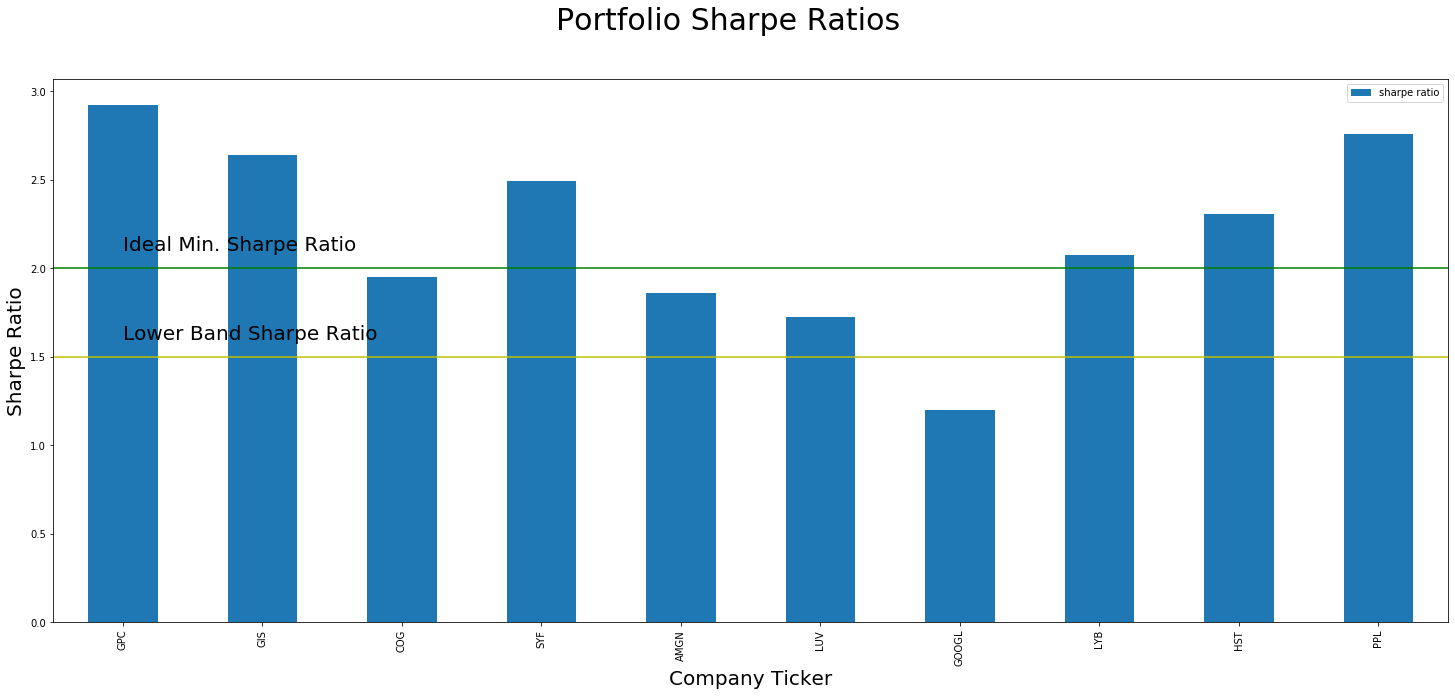

In [69]:
# plotting Sharpe Ratios for portfolio
portfolio_df.plot(x='ticker',y='sharpe ratio', kind='bar', figsize=(25,10))
plt.suptitle('Portfolio Sharpe Ratios', fontsize=30)
plt.axhline(2, color='g')
plt.text(0,2.1,'Ideal Min. Sharpe Ratio',rotation=0,fontsize=20)
plt.axhline(1.5, color='y')
plt.text(0,1.6,'Lower Band Sharpe Ratio',rotation=0,fontsize=20)
plt.xlabel('Company Ticker', fontsize=20)
plt.ylabel('Sharpe Ratio',fontsize=20)

Text(0, 0.5, 'P/E Ratio')

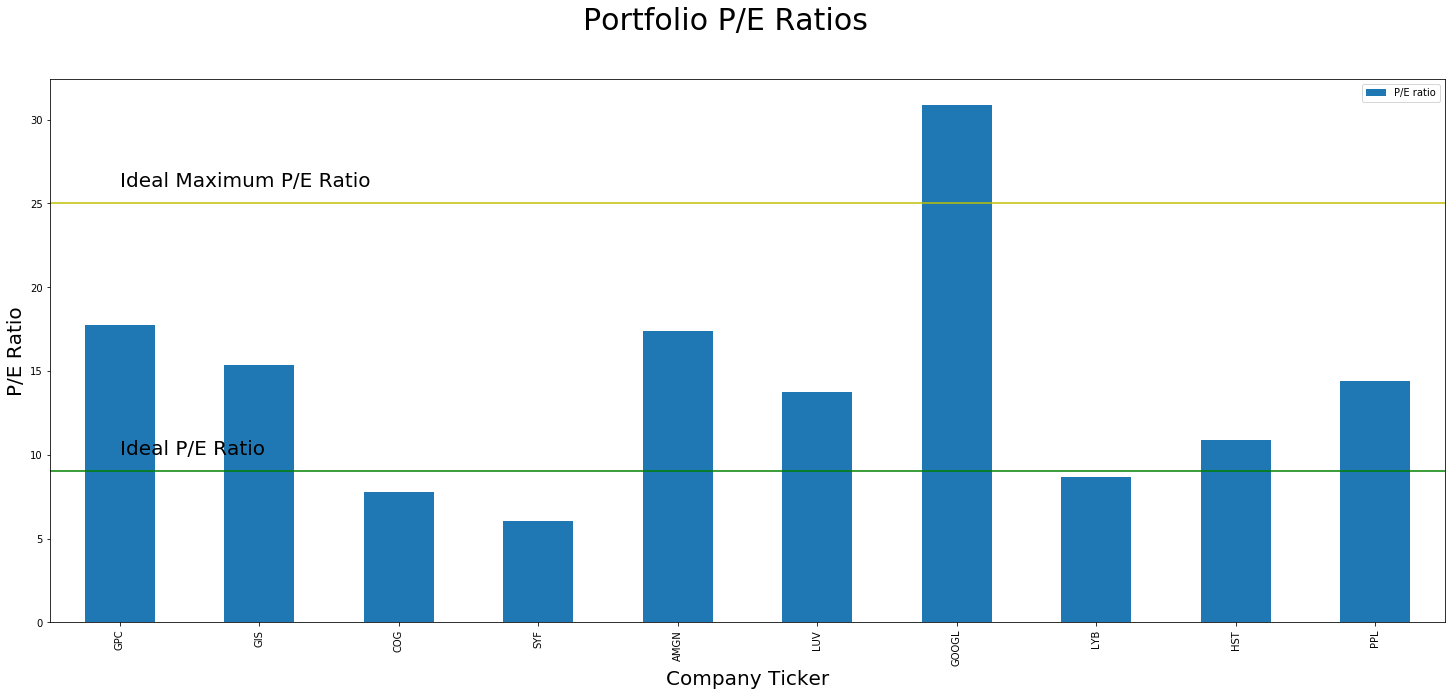

In [70]:
# plotting P/E Ratios for portfolio
portfolio_df.plot(x='ticker',y='P/E ratio', kind='bar', figsize=(25,10))
plt.suptitle('Portfolio P/E Ratios', fontsize=30)
plt.axhline(25, color='y')
plt.text(0,26,'Ideal Maximum P/E Ratio',rotation=0,fontsize=20)
plt.axhline(9, color='g')
plt.text(0,10,'Ideal P/E Ratio',rotation=0,fontsize=20)
plt.xlabel('Company Ticker', fontsize=20)
plt.ylabel('P/E Ratio',fontsize=20)